# Sentinel-3 zarr products

In [1]:
using CopernicusData
using Plots
using Downloads
using YAXArrays

const PRODUCT_PATH = "https://common.s3.sbg.perf.cloud.ovh.net/eoproducts"
const SLSFRP="S03SLSFRP_20200908T182648_0179_A298_S883.zarr.zip"

"S03SLSFRP_20200908T182648_0179_A298_S883.zarr.zip"

## SLSTR Level-2 FRP

In [2]:
frp_path = joinpath(PRODUCT_PATH, SLSFRP)
frp_path

"https://common.s3.sbg.perf.cloud.ovh.net/eoproducts/S03SLSFRP_20200908T182648_0179_A298_S883.zarr.zip"

In [3]:
local_path = joinpath(tempdir(),SLSFRP)
Downloads.download(frp_path, local_path)
frp = open_datatree(local_path)
frp

📂 root
├─ 📂 conditions
├─ ├─ 📂 geometry
├─ ├─ 📂 meteorology
├─ ├─ 📂 processing
├─ ├─ ├─ 📂 fnadir
├─ ├─ ├─ └─ 📂 orphan
├─ ├─ └─ 📂 inadir
├─ ├─ └─ └─ 📂 orphan
├─ ├─ 📂 time_an
├─ ├─ 📂 time_bn
├─ └─ 📂 time_in
├─ 📂 measurements
├─ ├─ 📂 anadir
├─ ├─ 📂 bnadir
├─ ├─ 📂 fnadir
├─ ├─ └─ 📂 orphan
├─ └─ 📂 inadir
├─ └─ └─ 📂 orphan
└─ 📂 quality
└─ ├─ 📂 fnadir
└─ └─ 📂 inadir


The product is represented by a hierarchical tree structure `YAXTrees.YAXTree`


### Opening measurements data (1D)


In [4]:
meas = frp.measurements.inadir
meas

📂 inadir
└─ 📂 orphan


### Plot active fire pixels

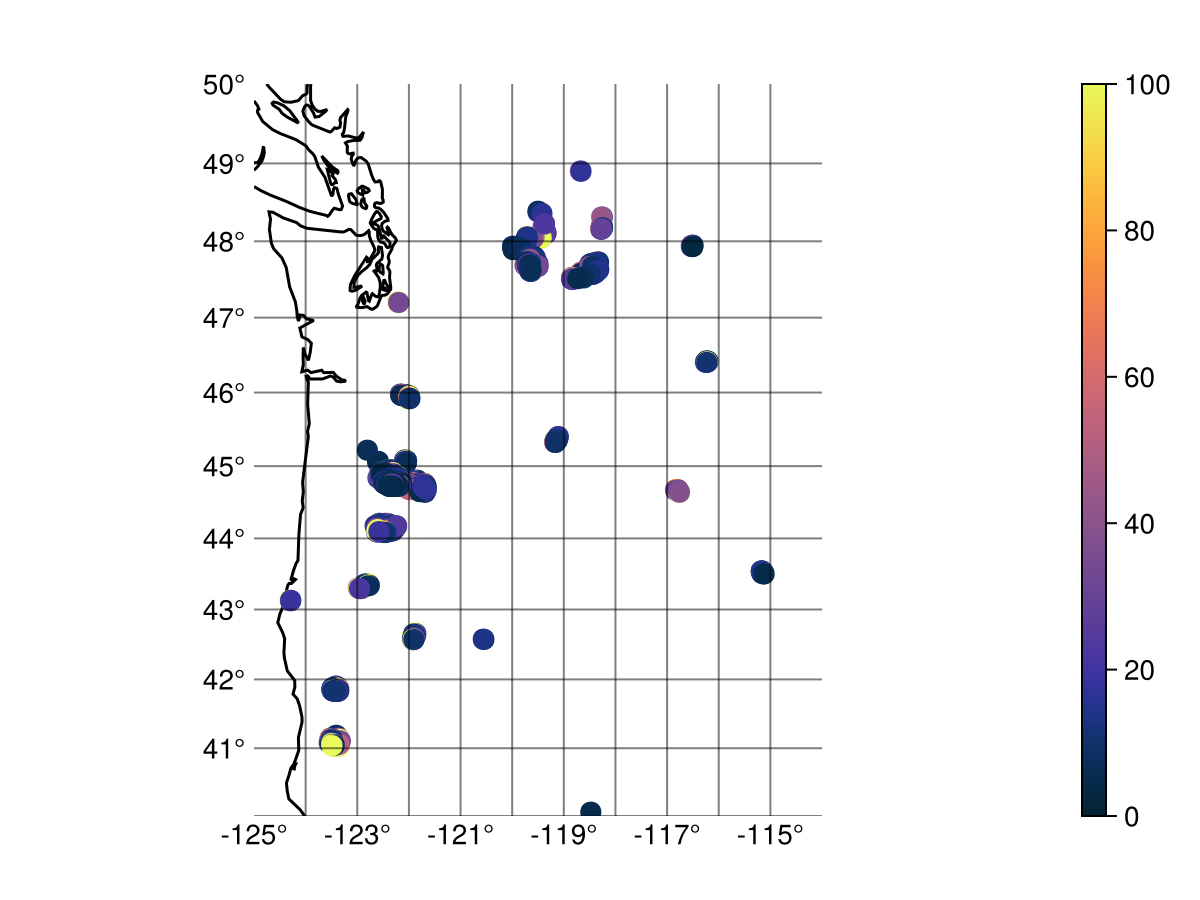

In [5]:
using CairoMakie, GeoMakie

frp_vals = Int64.(round.(frp.measurements.inadir.frp_mwir.data))
fig = Figure()
ax = GeoAxis(fig[1,1]; dest = "+proj=merc")
GeoMakie.xlims!(ax, -125, -114)
GeoMakie.ylims!(ax, 40, 50)
# lines!(ax, GeoMakie.coastlines(ax))
lines!(ax, GeoMakie.coastlines(50), color=:black)
s=GeoMakie.scatter!(ax, 
    frp.measurements.inadir.longitude.data,
    frp.measurements.inadir.latitude.data,
    # color=frp.measurements.inadir.frp_mwir.data,
    color=frp_vals,
    colormap=:thermal,
    markersize=15,
    colorrange=(0, 100),
    )
Colorbar(fig[1,2],s, ticks=0:20:100)
fig